In [3]:
#We have stock data for 20 years, With data formatted as follows:Date,Open,High,Low,Close,Volume,Dividends and Stock Splits
#For omx30 we can discard Volume, dividends and stock splits as they are not relevant for the prediction
#We want to output a predection for the next days high and low based on the previous days data
#We will use the open, high, low, close and volume as input to the model

/Users/palhagen/.virtualenvs/Scalable_Machine_learning_Project/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#Handle formatt of data and import from csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

path_to_data = 'omx30_data.csv'
data = pd.read_csv(path_to_data)
data = data.drop(columns=['Unnamed: 0','Date','Volume', 'Dividends', 'Stock Splits'])  # Drop irrelevant columns

input_features = data[['Open', 'High', 'Low', 'Close']].values  # Input features
output_features = data[['High', 'Low']].values  # Output features



# Normalize the data
scaler = MinMaxScaler()
input_features_scaled = scaler.fit_transform(input_features)
target_features_scaled = scaler.fit_transform(output_features)

#Prepare the data for the LSTM model
def create_sequences(input_data, output_data, timesteps):
    xs, ys = [], []
    for i in range(len(input_data) - timesteps):
        x = input_data[i:i + timesteps]
        y = output_data[i + timesteps]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [5]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


timesteps = 10  # Length of the input sequence
input_dim = 4  # Number of features in the input
num_outputs = 2  # Number of outputs

# Create the model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim)))  # LSTM layer with 64 units
model.add(Dense(num_outputs))  # Dense layer for multiple outputs
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model

# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(input_features_scaled, target_features_scaled, test_size=0.2, shuffle=False)

# Create sequences for the LSTM model
x_train, y_train = create_sequences(x_train, y_train, timesteps)


/Users/palhagen/.virtualenvs/Scalable_Machine_learning_Project/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0225
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7950e-04
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4519e-04
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6198e-04
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5634e-04
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5531e-04
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4304e-04
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4671e-04
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4922e-04
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4194e-04
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3263e-04
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3447e-04
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2489e-04
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.

In [7]:
#Evaluate the model
x_test, y_test = create_sequences(x_test, y_test, timesteps)
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1189e-04 


8.764961967244744e-05

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


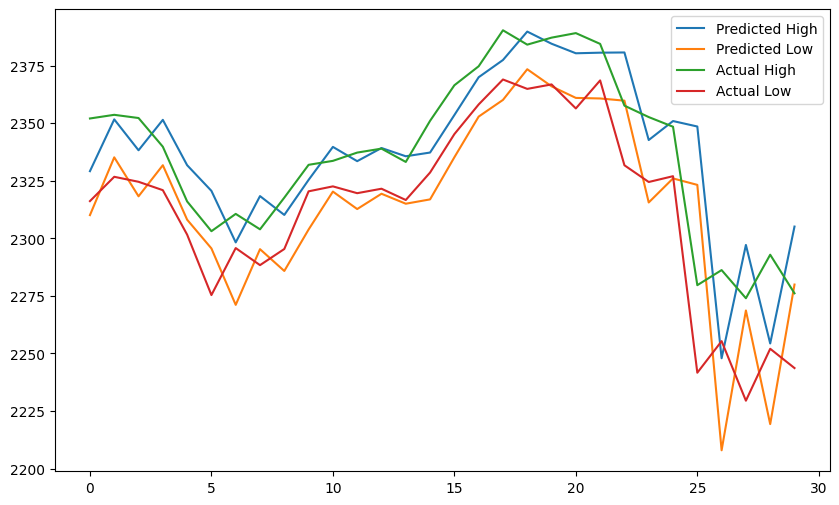

In [18]:
#Print the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_inverse = scaler.inverse_transform(y_test)

#Plot the predictions
import matplotlib.pyplot as plt
start = 0 # Starting index of the plot
end = 30 # Ending index of the plot

plt.figure(figsize=(10, 6))
plt.plot(predictions[start:end, 0], label='Predicted High')
plt.plot(predictions[start:end, 1], label='Predicted Low')
plt.plot(y_inverse[start:end, 0], label='Actual High')
plt.plot(y_inverse[start:end, 1], label='Actual Low')
plt.legend()
plt.show()


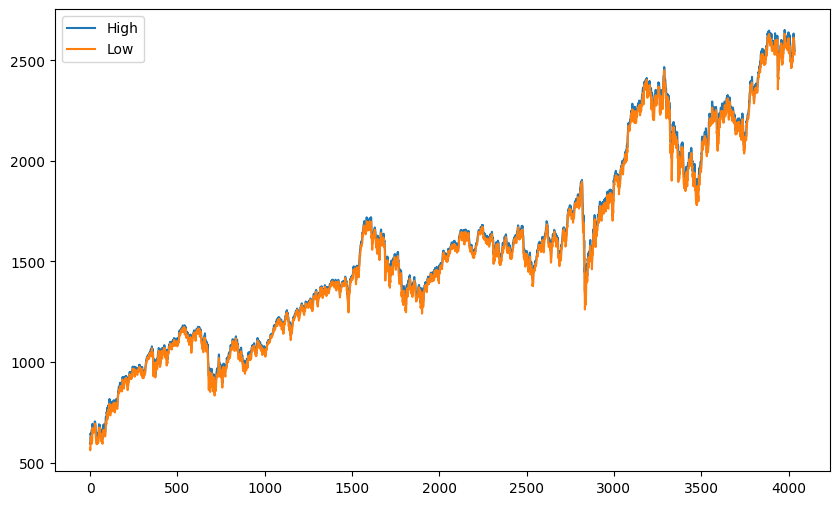

In [16]:
#plot the pure training data 
plt.figure(figsize=(10, 6))
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.legend()
plt.show()

In [17]:
#Tommorows prediction
x_input = input_features_scaled[-timesteps:]
x_input = x_input.reshape((1, timesteps, input_dim))
prediction = model.predict(x_input)
prediction = scaler.inverse_transform(prediction)
print(f"Predicted High: {prediction[0][0]}")
print(f"Predicted Low: {prediction[0][1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted High: 2543.7255859375
Predicted Low: 2516.38916015625
